## Generador

In [3]:
from datetime import datetime, date, time, timedelta
import pylab as plt
import calendar
import numpy as np
import math
from scipy import stats

def val(xo,m,a,c,M):
    u=0
    dat_aux=[]
    dato=[]
    x=[]
    us=0
    n = 0
    xn = xo
    
    while(n<m):
        xn = num(a,c,M,n,xn)
        x.append(float(xn))
        us=(float(xn)/M)
        dato.append(us)
        n+=1
    return dato;

def num(a,c,M,n,xn):
    xn = str(((a*int(xn))+c)%M)
    return xn 

## Kolmogorov - Smirnov

In [4]:
def colmo(n,u,x):
    
    count, bins, ignored = plt.hist(x, 25, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()
    
    x1 = np.arange(1/n,1+1/n,1/n)
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))
    
    De=np.absolute(y2-y1)
    #print("De = ",np.max(De))

    # Plotting
    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[np.argmax(De)],x1[np.argmax(De)]]
    y3 = [np.min([y1[np.argmax(De)],y2[np.argmax(De)]]),np.max([y1[np.argmax(De)],y2[np.argmax(De)]])]
    plt.step(x3,y3,label='D')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    plt.ylim(0, 1.05)

    plt.show()
    
    D,pvalue = stats.kstest(y2, 'uniform')
    print("D = ", D)
    print("p-value = ", pvalue)

In [6]:
#ei
def esperada(n,k):
    u=[n/k]*k
    return (u)

#oi
def observada(x,k):
    frecuencia=[0]*k
    for dat in x:
        n=k-1
        while((dat*k)<n):
            n-=1
        frecuencia[n]+=1
    return(frecuencia)

## Chi^2

In [7]:
def chi(n,x):
    x2=0
    k=10
    oi=observada(x,k)
    ei=esperada(n,k)
    y=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for con in range(k):
        x2=x2+(((float(oi[con])-float(ei[con]))**2)/float(ei[con]))
    print('Valor de chi cuadrado (X^2) ', x2)
    print('Frecuencia Observada ',oi)
    plt.hist(x,k,(0,1))
    plt.plot(y,ei)
    plt.show()



## Test de rachas

In [8]:
def rachas(x,k):
    aux=0
    rach=0
    cont_rac=1
    num_rach=[1]
    frecuencia=[0]*k
    for dat in x:
        n=k-1
        while((dat*k)<n):
            n-=1
        if(aux!=n):
            cont_rac+=1
        aux=n
        frecuencia[n]+=1
    print(frecuencia)
    print('La cantidad de rachas es de ',cont_rac)
    plt.plot(range(len(x)),x)
    plt.show()

## Kolmogorov con generador personal

Ingrese el valor de n: 2


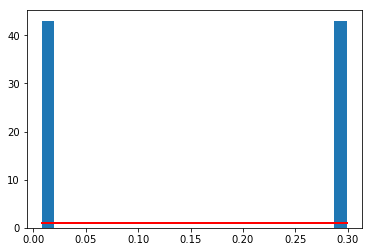

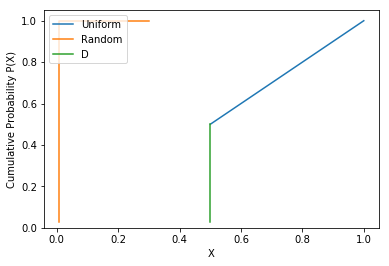

D =  0.5
p-value =  0.5


In [9]:
print("Ingrese el valor de n: ", end="")
n = int(input())
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,515,1,2**35)
colmo(n,u,x)

## Kolmogorov con generador numpy

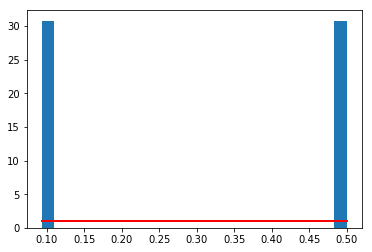

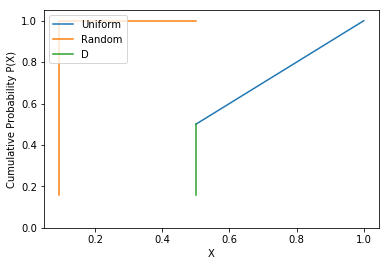

D =  0.5
p-value =  0.5


In [10]:
x = np.random.uniform(0,1,n)
colmo(n,u,x)

## Chi^2 con generador personal

Ingrese el valor de n: 3
Valor de chi cuadrado (X^2)  6.999999999999998
Frecuencia Observada  [1, 0, 0, 0, 1, 0, 1, 0, 0, 0]


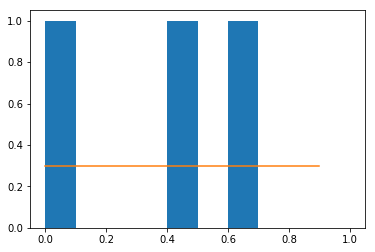

In [11]:
print("Ingrese el valor de n: ", end="")
c = int(input())
sem=((datetime.now().microsecond/12)*datetime.now().second)
x = val(sem,c,515,1,2**35)
chi(c,x)

## Chi^2 con generador numpy

Valor de chi cuadrado (X^2)  13.666666666666668
Frecuencia Observada  [0, 0, 0, 0, 0, 0, 2, 1, 0, 0]


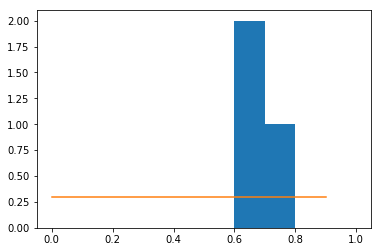

In [12]:
x = np.random.uniform(0,1,c)
chi(c,x)

## Test de Rachas con generador personal

Ingrese el valor de n: 5
[2, 0, 0, 0, 1, 0, 1, 0, 1, 0]
La cantidad de rachas es de  4


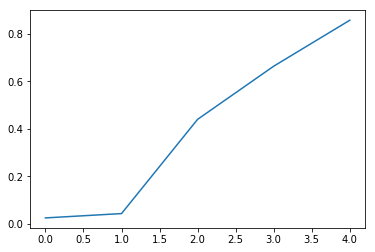

In [13]:
print("Ingrese el valor de n: ", end="")
r = int(input())
k=10
sem=((datetime.now().microsecond/12)*datetime.now().second)
x = val(sem,r,515,1,2**35)
rachas(x,k)

## Test de Rachas con generador numpy

[0, 1, 0, 1, 0, 0, 1, 0, 2, 0]
La cantidad de rachas es de  5


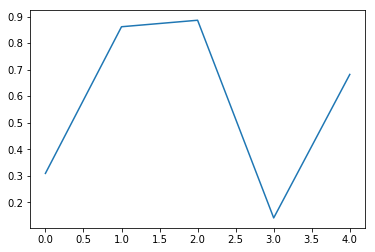

In [14]:
x = np.random.uniform(0,1,r)
rachas(x,k)

## Kolmogorov con mi generador datos Randu

Ingrese el valor de n: 5
Kolmogorov


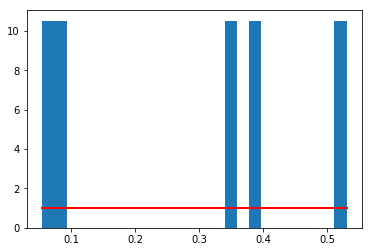

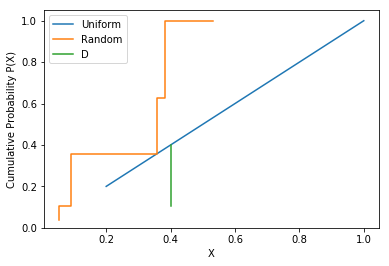

D =  0.296845217244
p-value =  0.700114196109


In [15]:
print("Ingrese el valor de n: ", end="")
n = int(input())
print("Kolmogorov")
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,65539,0,2**31)
colmo(n,u,x)

## Chi^2 con  generador Randu

Chi^2
Valor de chi cuadrado (X^2)  23.000000000000004
Frecuencia Observada  [2, 0, 0, 2, 0, 1, 0, 0, 0, 0]


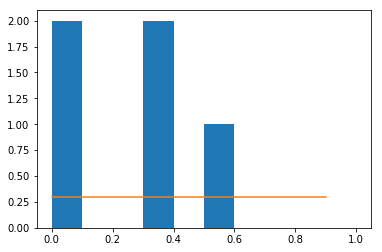

In [16]:
print("Chi^2")
chi(c,x)

## Rachas con generador  Randu

Rachas
[2, 0, 0, 2, 0, 1, 0, 0, 0, 0]
La cantidad de rachas es de  4


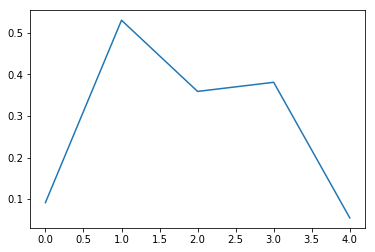

In [17]:
print("Rachas")
k=10
rachas(x,k)

## Kolmogorov con generador datos Sinclair ZX81

Ingrese el valor de n: 7
Kolmogorov


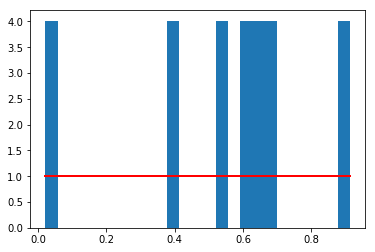

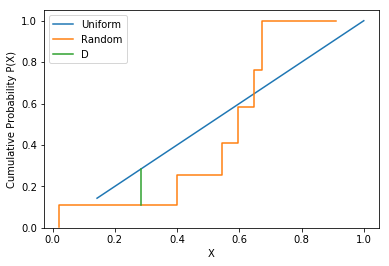

D =  0.174472757259
p-value =  0.983389750275


In [18]:
print("Ingrese el valor de n: ", end="")
n = int(input())
print("Kolmogorov")
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,75,0,(2**16)+1)
colmo(n,u,x)

## Chi^2 con generador datos Sinclair ZX81

Chi^2
Valor de chi cuadrado (X^2)  25.666666666666664
Frecuencia Observada  [1, 0, 0, 0, 1, 2, 2, 0, 0, 1]


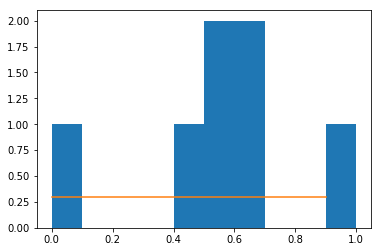

In [19]:
print("Chi^2")
chi(c,x)

## Rachas con generador datos Sinclair ZX81

Rachas
[1, 0, 0, 0, 1, 2, 2, 0, 0, 1]
La cantidad de rachas es de  8


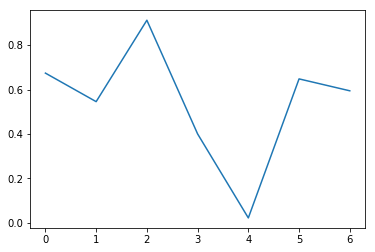

In [20]:
print("Rachas")
k=10
rachas(x,k)

## Kolmogorov con generador Numerical reciepes

Ingrese el valor de n: 4
Kolmogorov


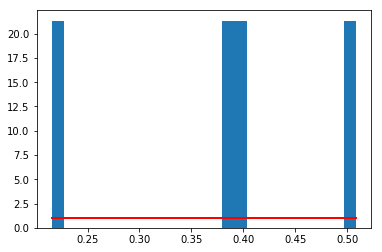

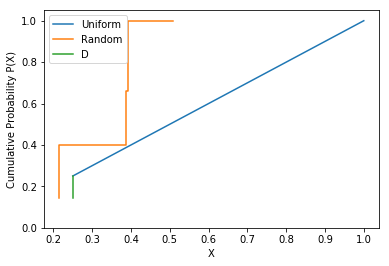

D =  0.25
p-value =  0.963945243665


In [21]:
print("Ingrese el valor de n: ", end="")
n = int(input())
print("Kolmogorov")
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,1664525,1013904223,2**32)
colmo(n,u,x)

## Chi^2 con  generador  Numerical reciepes

Chi^2
Valor de chi cuadrado (X^2)  15.000000000000002
Frecuencia Observada  [0, 0, 1, 2, 0, 1, 0, 0, 0, 0]


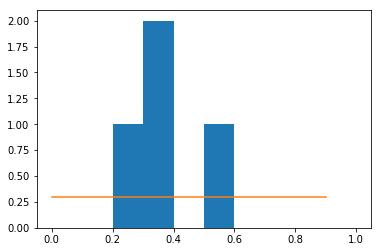

In [22]:
print("Chi^2")
chi(c,x)

## Rachas con generador Numerical reciepes

Rachas
[0, 0, 1, 2, 0, 1, 0, 0, 0, 0]
La cantidad de rachas es de  4


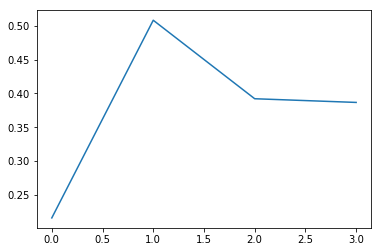

In [23]:
print("Rachas")
k=10
rachas(x,k)

## Kolmogorov con generador Borland C/C++

Ingrese el valor de n: 2
Kolmogorov


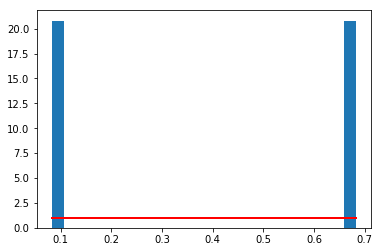

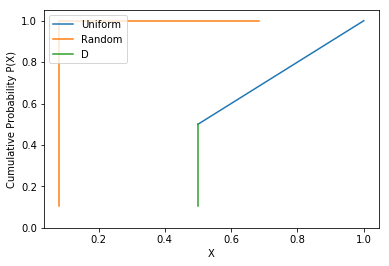

D =  0.5
p-value =  0.5


In [24]:
print("Ingrese el valor de n: ", end="")
n = int(input())
print("Kolmogorov")
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,22695477,1,2**32)
colmo(n,u,x)

## Chi^2 con generador  Borland C/C++

Chi^2
Valor de chi cuadrado (X^2)  5.666666666666665
Frecuencia Observada  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


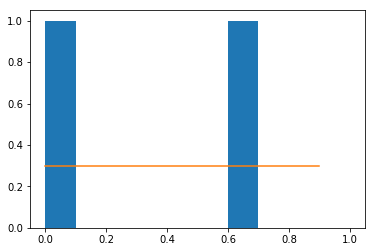

In [25]:
print("Chi^2")
chi(c,x)

## Rachas con generador Borland C/C++

Rachas
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
La cantidad de rachas es de  2


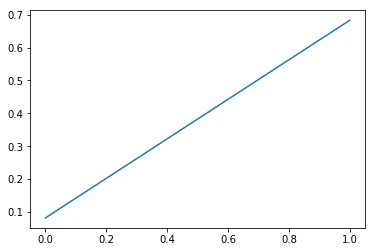

In [26]:
print("Rachas")
k=10
rachas(x,k)